In [415]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

matplotlib.rcParams['text.usetex']    = True
matplotlib.rcParams['font.family']    = 'serif'
matplotlib.rcParams['font.size']      = '16'
matplotlib.rcParams['figure.figsize'] = 6.4, 4.8

code_dir = "/global/cfs/cdirs/m3166/buschman/NSaxion-master/python/"   
                                                                                    
sys.path.append(code_dir)                                                           
import theory                                                                       
from scipy.interpolate import interp1d                                              
import NScool_process as NSp 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [444]:
APR = h5py.File('../output/APR_Cat_1.4_SFB-a-T73.hdf5','r')
print(APR.keys())

params = APR['params'][:]
E = APR['E'][:]
alpha = APR['alpha'][:]
spec_1s0n_N100 = APR['1s0n_N100'][:]
spec_1s0n_N1000 = APR['1s0n_N1000'][:]
spec_1s0n_N10000 = APR['1s0n_N10000'][:]
spec_1s0n_N262145 = APR['1s0n_N262145'][:]

raw_rT = APR['raw_rT'][:]
raw_T = APR['raw_T'][:]
raw_ephi = APR['raw_ephi'][:]
raw_dvol = APR['raw_dvol'][:]
raw_dvdr = APR['raw_dvdr'][:]

raw_rTc = APR['raw_rTc'][:]
raw_Tcn = APR['raw_Tcn'][:]
raw_Tcp = APR['raw_Tcp'][:]
raw_kfn = APR['raw_kfn'][:]
raw_kfp = APR['raw_kfp'][:]
raw_mstn = APR['raw_mstn'][:]
raw_mstp = APR['raw_mstp'][:]
raw_state = APR['raw_state'][:]

r_interp = APR['r_interp'][:]
Tcn_interp = APR['Tcn_interp'][:]
T_interp = APR['T_interp'][:]
Rnn = APR['Rnn'][:]
Rnp = APR['Rnp'][:]
Rpp = APR['Rpp'][:]

integrand_r = APR['integrand_r'][:]
integrand_E = APR['integrand_E'][:]
integrand_n = []
integrand_p = []
for i in range(len(integrand_E)):
    integrand_n.append( APR['integrand_n_'+str(i)][:] )
    integrand_p.append( APR['integrand_p_'+str(i)][:] )
    
pbf_1s0n = np.zeros((len(alpha), len(E)))
pbf_1s0p = np.zeros((len(alpha), len(E)))
bremsstrahlung_nn = np.zeros((len(alpha), len(E)))
bremsstrahlung_np = np.zeros((len(alpha), len(E)))
bremsstrahlung_pp = np.zeros((len(alpha), len(E)))

for i in range(len(alpha)):
    pbf_1s0n[i] = APR['1s0n_a'+str(i)][:]
    pbf_1s0p[i] = APR['1s0p_a'+str(i)][:]
    bremsstrahlung_nn[i] = APR['bremsstrahlung_nn_a'+str(i)][:]
    bremsstrahlung_np[i] = APR['bremsstrahlung_np_a'+str(i)][:]
    bremsstrahlung_pp[i] = APR['bremsstrahlung_pp_a'+str(i)][:]

<KeysViewHDF5 ['1s0n_N100', '1s0n_N1000', '1s0n_N10000', '1s0n_N262145', '1s0n_a0', '1s0n_a1', '1s0n_a2', '1s0p_a0', '1s0p_a1', '1s0p_a2', 'E', 'Rnn', 'Rnp', 'Rpp', 'T_interp', 'Tcn_interp', 'Tcp_interp', 'alpha', 'bremsstrahlung_nn_a0', 'bremsstrahlung_nn_a1', 'bremsstrahlung_nn_a2', 'bremsstrahlung_np_a0', 'bremsstrahlung_np_a1', 'bremsstrahlung_np_a2', 'bremsstrahlung_pp_a0', 'bremsstrahlung_pp_a1', 'bremsstrahlung_pp_a2', 'integrand_E', 'integrand_n_0', 'integrand_n_1', 'integrand_n_2', 'integrand_p_0', 'integrand_p_1', 'integrand_p_2', 'integrand_r', 'params', 'r_interp', 'raw_T', 'raw_Tcn', 'raw_Tcp', 'raw_dvdr', 'raw_dvol', 'raw_ephi', 'raw_kfn', 'raw_kfp', 'raw_mstn', 'raw_mstp', 'raw_rT', 'raw_rTc', 'raw_state']>


Text(0, 0.5, '$\\gamma^6$')

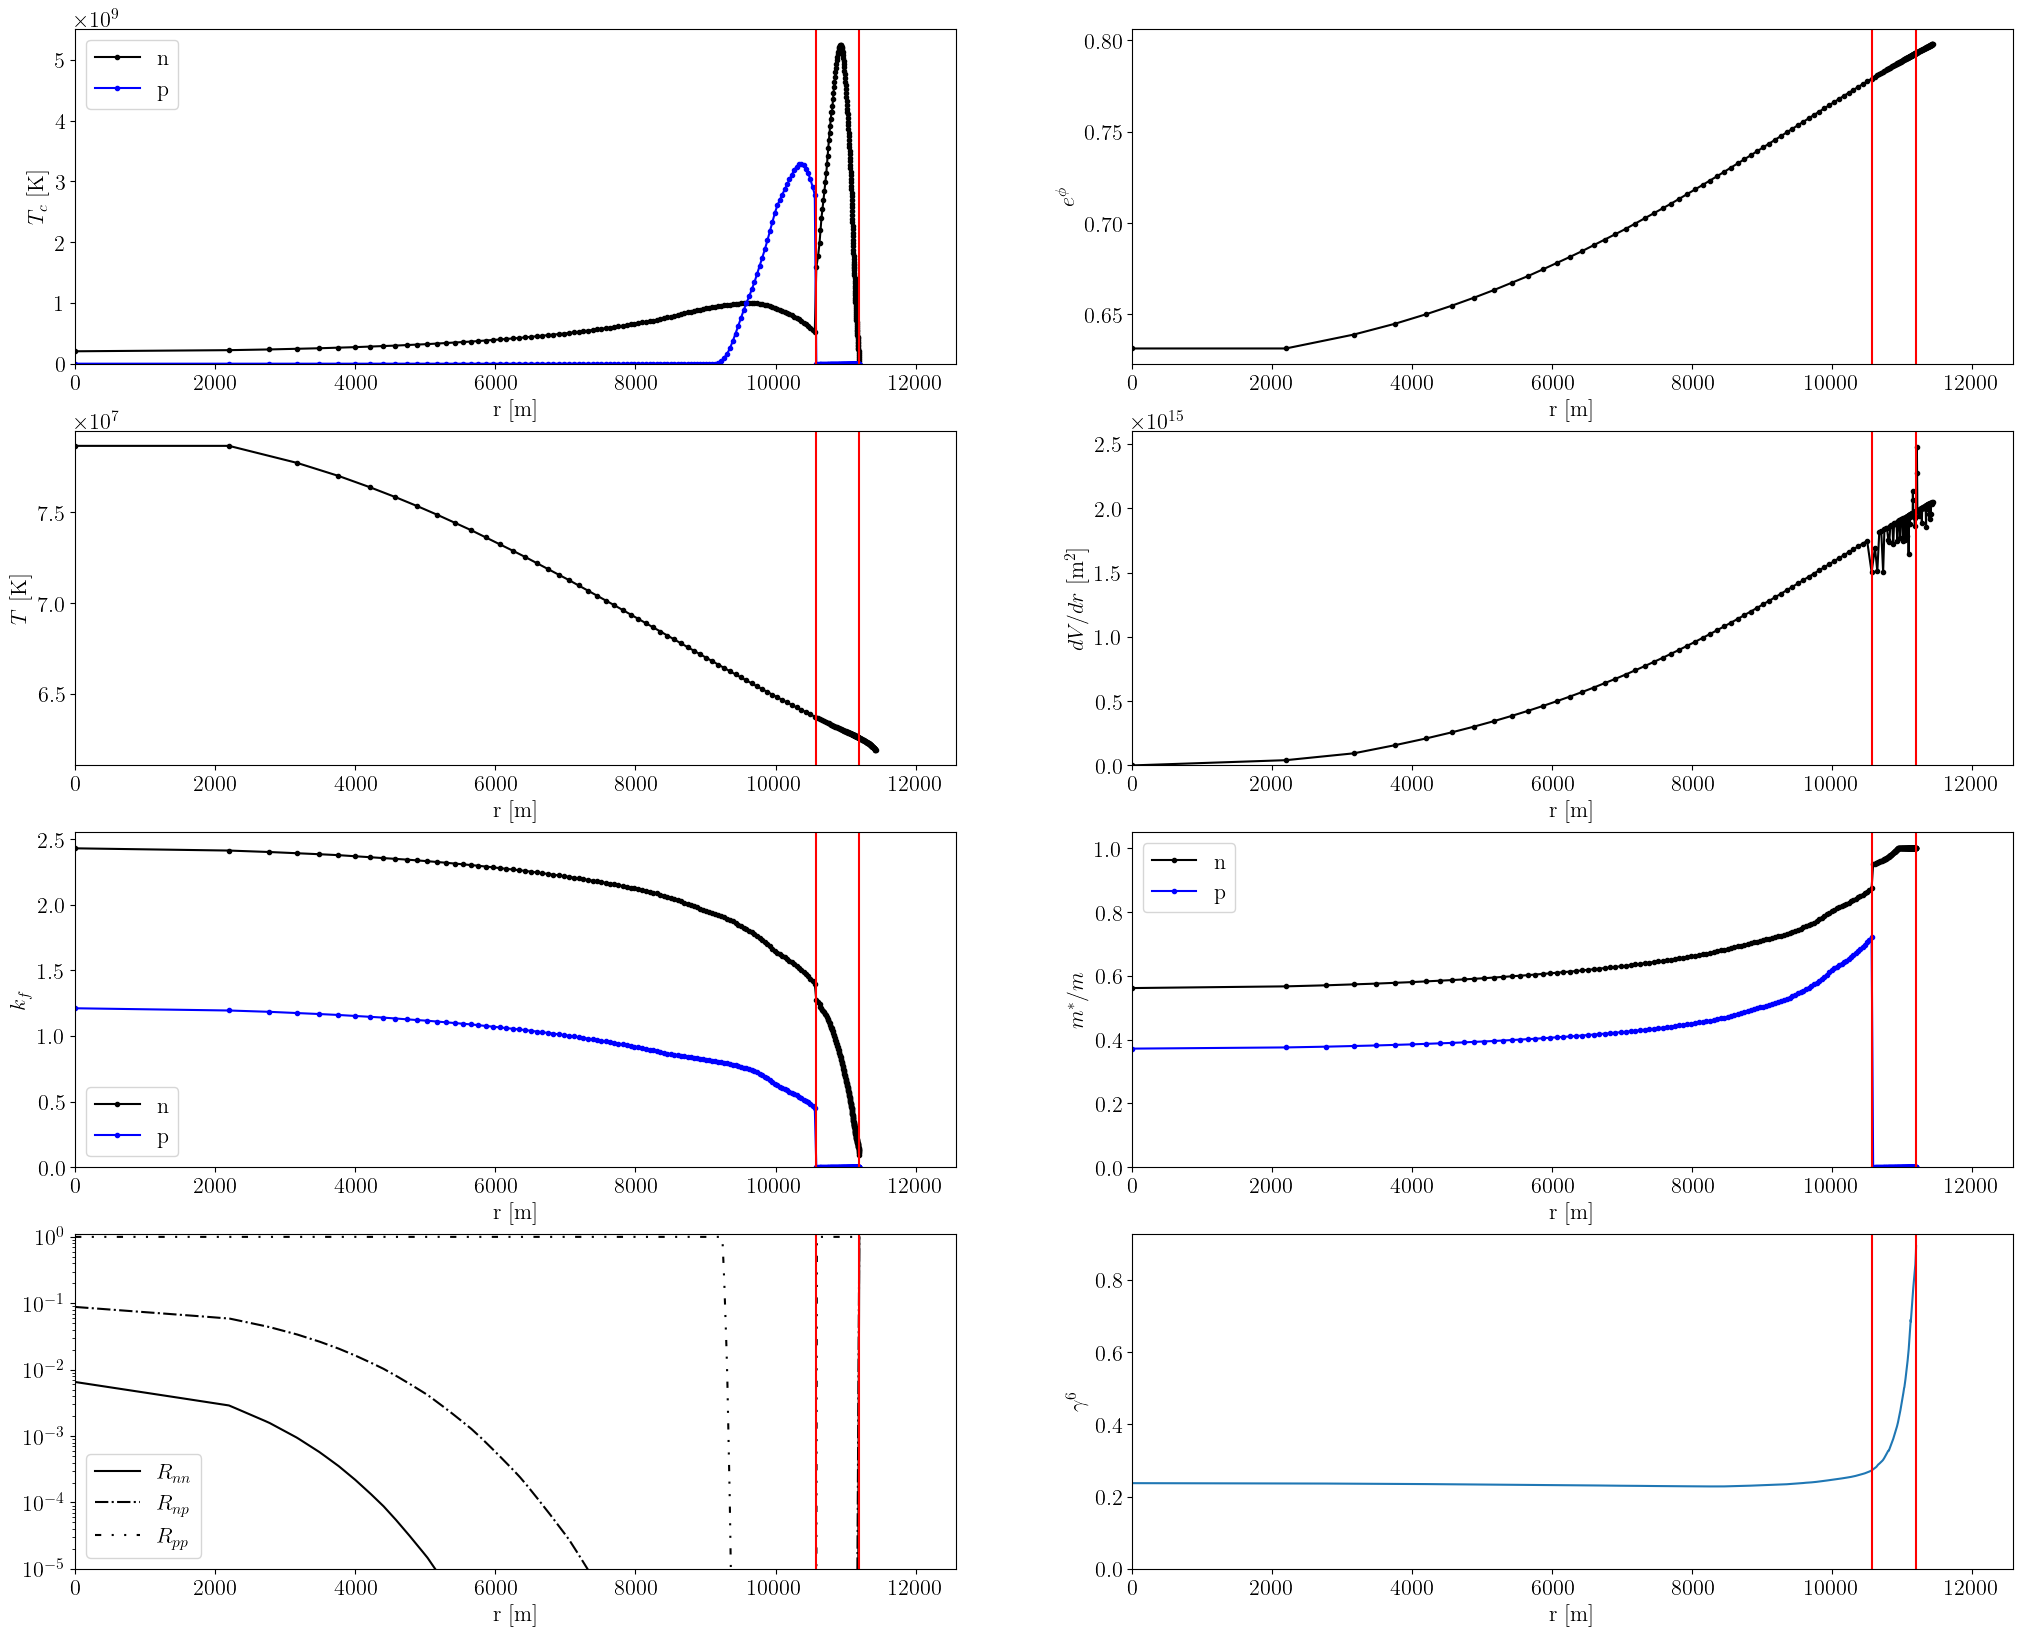

In [445]:
fig, ax = plt.subplots(figsize=(25,20), nrows=4, ncols=2)

ax[0,0].plot(raw_rTc, raw_Tcn, marker='.', label='n', color='black')
#ax[0,0].plot(r_interp, Tcn_interp, marker='', color='orange')
ax[0,0].plot(raw_rTc, raw_Tcp, marker='.', label='p', color='blue')
ax[0,0].legend()

ax[1,0].plot(raw_rT, raw_T, marker='.', color='black')
#ax[1,0].plot(r_interp, T_interp, marker='', color='orange')

ax[0,1].plot(raw_rT, raw_ephi, marker='.', color='black')

ax[1,1].plot(raw_rT, raw_dvdr, marker='.', color='black')

ax[2,0].plot(raw_rTc, raw_kfn, marker='.', color='black', label='n')
ax[2,0].plot(raw_rTc, raw_kfp, marker='.', color='blue', label='p')
ax[2,0].legend()

ax[2,1].plot(raw_rTc, raw_mstn, marker='.', color='black', label='n')
ax[2,1].plot(raw_rTc, raw_mstp, marker='.', color='blue', label='p')
ax[2,1].legend()

ax[3,0].plot(r_interp, Rnn, marker='', color='black', label=r'$R_{nn}$', linestyle='-')
ax[3,0].plot(r_interp, Rnp, marker='', color='black', label=r'$R_{np}$', linestyle='-.')
ax[3,0].plot(r_interp, Rpp, marker='', color='black', label=r'$R_{pp}$', linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax[3,0].legend()
ax[3,0].set_yscale('log')
ax[3,0].set_ylim(1e-5,1.1)

ax[3,1].plot(raw_rTc, 1/(1+1/3*raw_mstn*(raw_kfn/1.68))**6)

for i in [0,1,2,3]:
    for j in [0,1]:
        ax[i,j].set_xlim(0, np.max(raw_rT)*1.1)
        ax[i,j].set_xlabel(r'r [m]')
        ax[i,j].axvline(params[0], color='red')
        ax[i,j].axvline(params[1], color='red')
        
ax[0,0].set_ylim(0,)
ax[1,1].set_ylim(0,)
ax[2,0].set_ylim(0,)
ax[2,1].set_ylim(0,)
ax[3,1].set_ylim(0,)
ax[0,0].set_ylabel(r'$T_c$ [K]')
ax[1,0].set_ylabel(r'$T$ [K]')
ax[0,1].set_ylabel(r'$e^{\phi}$')
ax[1,1].set_ylabel(r'$dV/dr$ [m$^2$]')
ax[2,0].set_ylabel(r'$k_f$')
ax[2,1].set_ylabel(r'$m^*/m$')
ax[3,1].set_ylabel(r'$\gamma^6$')

Text(0, 0.5, '$\\frac{1}{N_{a,\\mathrm{PBF}}}\\frac{d\\epsilon}{dE}$')

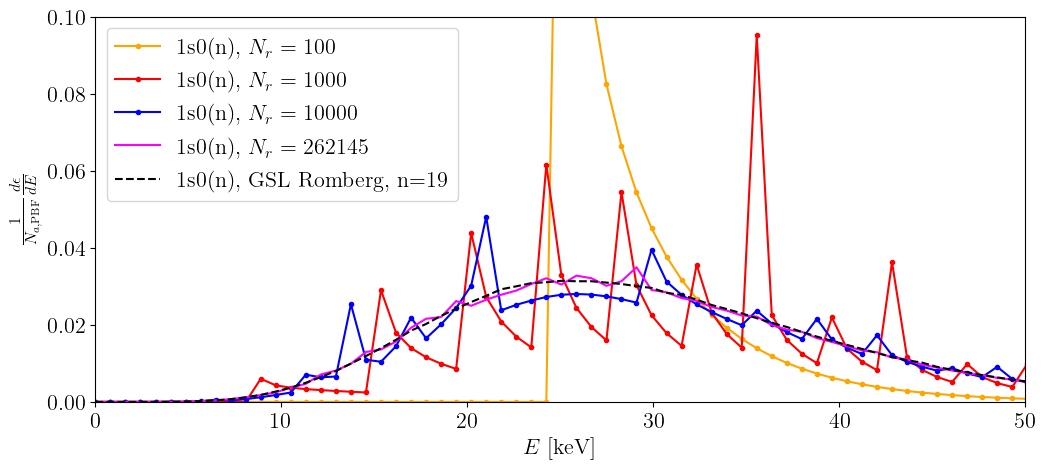

In [448]:
loc = np.where(alpha==1)[0][0]

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(E, spec_1s0n_N100/np.sum(spec_1s0n_N100), marker='.', label=r'1s0(n), $N_r=100$', color='orange')
ax.plot(E, spec_1s0n_N1000/np.sum(spec_1s0n_N1000), marker='.', label='1s0(n), $N_r=1000$', color='red')
ax.plot(E, spec_1s0n_N10000/np.sum(spec_1s0n_N10000), marker='.', label='1s0(n), $N_r=10000$', color='blue')
ax.plot(E, spec_1s0n_N262145/np.sum(spec_1s0n_N262145), marker='', label='1s0(n), $N_r=262145$', color='magenta')

ax.plot(E, pbf_1s0n[loc,:]/np.sum(pbf_1s0n[loc,:]), marker='', label='1s0(n), GSL Romberg, n=19', color='black', linestyle='--')
plt.legend()
plt.ylim(0, 0.1)
plt.xlim(np.min(E), 50)
plt.xlabel(r'$E$ [keV]')
plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

#plt.yscale('log')
#plt.ylim(1e-18,)

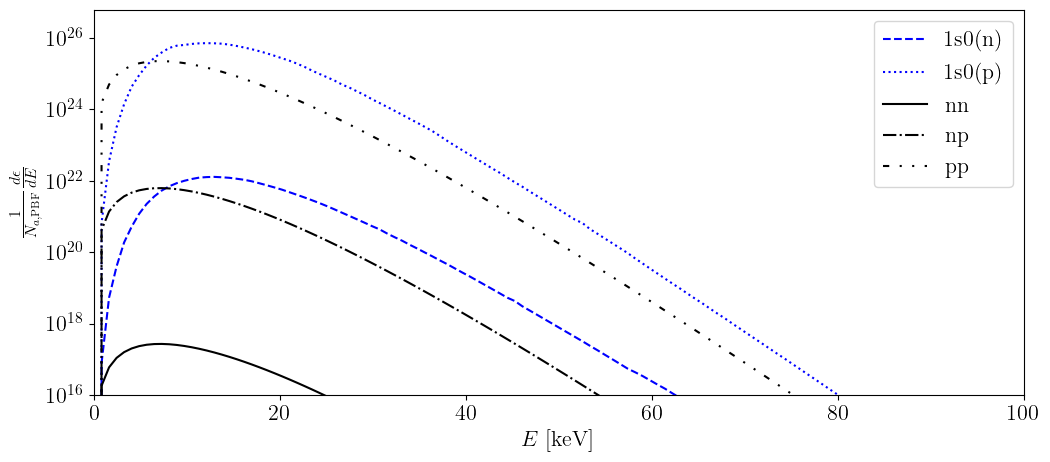

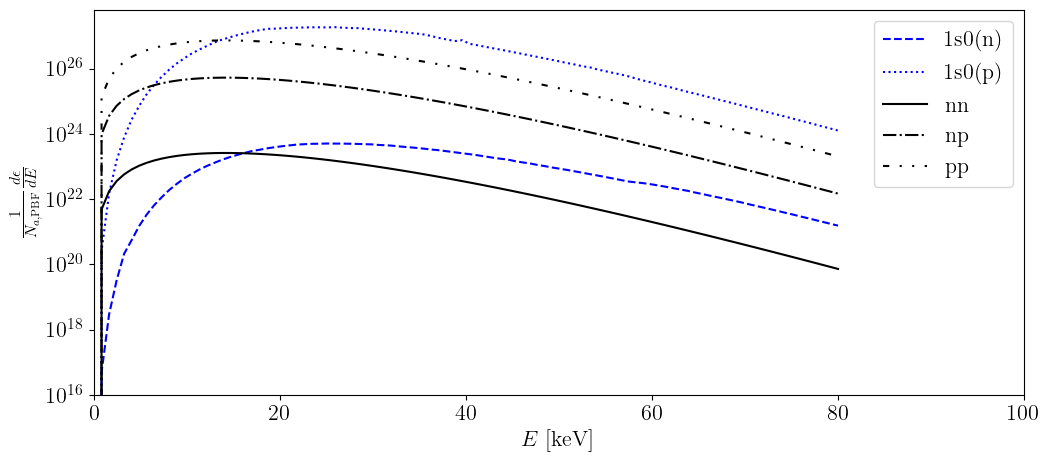

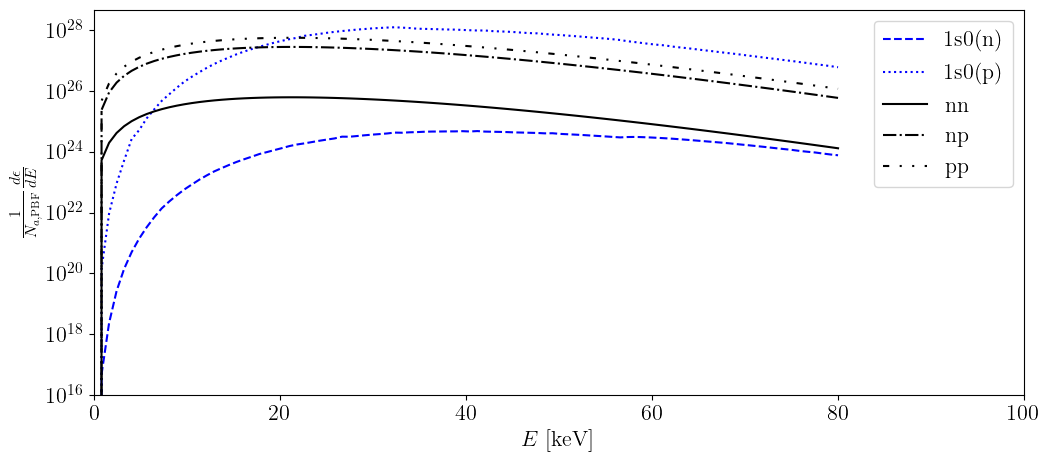

In [450]:
for i in range(len(alpha)):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(E, pbf_1s0n[i], marker='', label='1s0(n)', color='blue', linestyle='--')
    ax.plot(E, pbf_1s0p[i], marker='', label='1s0(p)', color='blue', linestyle=':')
    ax.plot(E, bremsstrahlung_nn[i], marker='', label='nn', color='black', linestyle='-')
    ax.plot(E, bremsstrahlung_np[i], marker='', label='np', color='black', linestyle='-.')
    ax.plot(E, bremsstrahlung_pp[i], marker='', label='pp', color='black', linestyle=(0, (3, 5, 1, 5, 1, 5)))
    #ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i], marker='', label='total', color='black', linestyle='-')
    #plt.plot(E, dFdE(E, params[2] * K2keV/1.31), label='thermal (old paper)', color='blue', linestyle=':')
    #plt.plot(E, dFdE(E, params[2] * K2keV * alpha[i]) * 3.2e20, label='bremsstrahlung (old paper)', color='blue', linestyle=':')

    plt.legend()
    plt.xlim(np.min(E), 100)
    plt.xlabel(r'$E$ [keV]')
    plt.ylabel(r'$\frac{1}{N_{a,\mathrm{PBF}}}\frac{d\epsilon}{dE}$')

    #plt.ylim(0,)
    plt.yscale('log')
    plt.ylim(1e16,)

In [452]:
N = 50
E_this = np.linspace(1,80,N)
E_mins = E_this[:-1]                                                           
E_maxs = E_this[1:]                                                                                                                                
kwargs={"bins_min": E_mins,"bins_max":E_maxs}  

mod_folder = "../eos/APR_Cat_1.4_SFB-a-T73/" 
NSi = NSp.NScool(mod_folder=mod_folder) 
                                                                                 
NSd=np.array(  [123.])                                                           
NSdd=np.array( [13.])                                                            
NSB0=np.array( [1.5e13])*0.95                                                    
NSdB0=np.array([0.1e13])                                                         
NSdB0 = np.sqrt(NSdB0**2+(0.1*NSB0)**2)   
Bpole = np.array([2.9])*1e13   
NSTeff_infty=np.array(      [0.050])                                                          
NSdTeff_infty=np.array(      [0.014])   
i=0

mse = theory.make_signal_NScool(NSi,Teff_infty=NSTeff_infty[i])              
mse.return_signal(d=NSd[0],B0=Bpole[0]*np.sin(np.pi/2),alpha=1,
                              superfluid=True,PBF=False,
                              gagg=1e-10,gaee=0.0e-14,gann=1e-10,gapp=1e-10,ma=5e-5,
                              E_min=E[0],E_max=E[-1],N_E=len(E), **kwargs)


dataX=[]
dataY=[]
for i in range(len(E_mins)):
    dataX.append(E_mins[i])
    dataX.append(E_maxs[i])
    dataY.append(mse.binned_flux[i])
    dataY.append(mse.binned_flux[i])

dataX = np.array(dataX)
dataY = np.array(dataY)


2.274759586673224e+26 1.0163004431697823e+29 1.86202432746265e+28


1.0
1.0


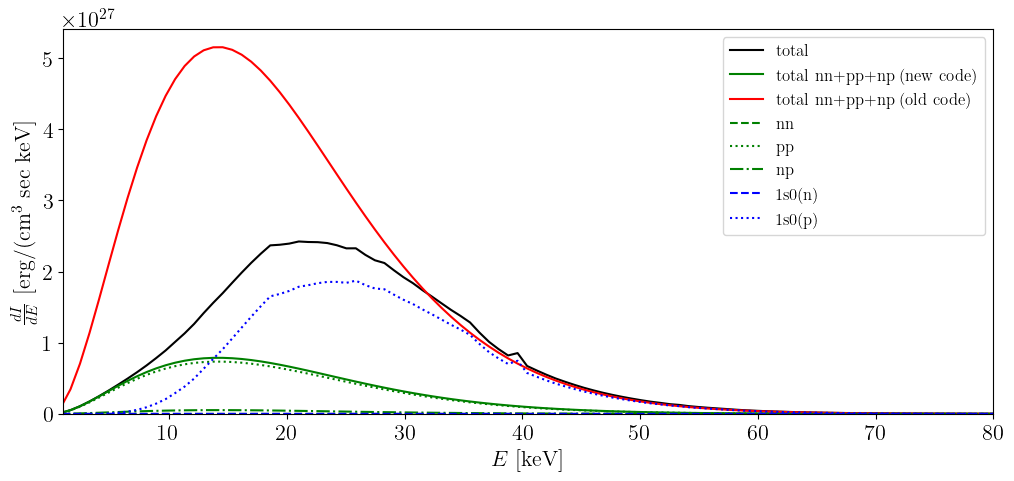

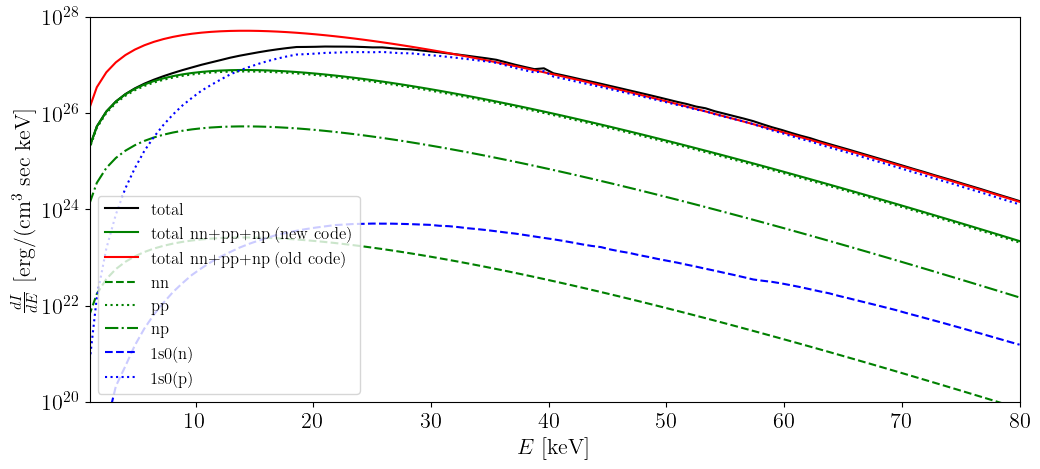

In [473]:
for i in [1]:
    for Log in [False, True]:
        print(alpha[i])
        scal = 1
        fig, ax = plt.subplots(figsize=(12,5))
        ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i]+pbf_1s0n[i]+pbf_1s0p[i], marker='', label='total', color='black', linestyle='-')
        ax.plot(E, bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i], marker='', label='total nn+pp+np (new code)', color='green', linestyle='-')
        plt.plot(mse.Es, mse.NSi.total_aNN_flux * mse.prim_spec * scal, label='total nn+pp+np (old code)', color='red')
        ax.plot(E, bremsstrahlung_nn[i], marker='', label='nn', color='green', linestyle='--')
        ax.plot(E, bremsstrahlung_pp[i], marker='', label='pp', color='green', linestyle=':')
        ax.plot(E, bremsstrahlung_np[i], marker='', label='np', color='green', linestyle='-.')

        ax.plot(E, pbf_1s0n[i], marker='', label='1s0(n)', color='blue', linestyle='--')
        ax.plot(E, pbf_1s0p[i], marker='', label='1s0(p)', color='blue', linestyle=':')



        #plt.plot(mse.Es, mse.NSi.total_ann_flux * mse.prim_spec * scal, label='nn (old code)', color='red', linestyle='--')
        #plt.plot(mse.Es, mse.NSi.total_app_flux * mse.prim_spec * scal, label='pp (old code)', color='red', linestyle=':')
        #plt.plot(mse.Es, mse.NSi.total_anp_flux * mse.prim_spec * scal, label='np (old code)', color='red', linestyle='-.')
        plt.legend(fontsize=12)
        plt.xlim(1, 80)
        plt.xlabel(r'$E$ [keV]')
        plt.ylabel(r'$\frac{dI}{dE}$ [erg/(cm$^3$ sec keV]')

        if Log == False:
            plt.ylim(0,)
        else:
            plt.yscale('log')
            plt.ylim(1e20,1e28)

In [456]:
np.sum(bremsstrahlung_pp[i]+bremsstrahlung_nn[i]+bremsstrahlung_np[i]) / np.sum((mse.NSi.total_aNN_flux * mse.prim_spec)[1:])

0.15288476588342859

In [459]:
(1/(1+1/3*raw_mstn*(raw_kfn/1.68))**6)[0] * 9.191e11/2.008e12

0.1086659712949654

In [246]:
len(E)

200

In [ ]:
3.17051 1.20685 1.17968 0.786789 1 1 2.0862e+08 0.563014 5.23283e+18

In [419]:
geff = 3.17051
kfp = 1.20685
T8 = 1.17968
gamma = 0.786789 
Rnp = 1 
Tcp = 1
Tcn = 2.0862e+08
mstn = 0.563014
epsilon = 5.23283e+18

In [431]:
gamma**6

0.23721911253881525

In [ ]:
anp_epsilon = 2.008e12*(self._eanp_star_factor_h*h**2+self._eanp_star_factor_g*g**2)/(1e-10)**2*(T8)**6 * mstn_interp**2





In [420]:
(mse.NSi._eanp_star_factor_g*(2*1e-10)**2)/(1e-10)**2

array([7.0737598 , 6.94642781, 6.87078747, 6.80356947, 6.743885  ,
       6.69171197, 6.63872912, 6.58665445, 6.54205842, 6.4900763 ,
       6.44556064, 6.40108278, 6.36319542, 6.31878929, 6.2744223 ,
       6.23009492, 6.19233814, 6.15545847, 6.11124043, 6.06706385,
       6.0294379 , 5.98618285, 5.94862454, 5.91193923, 5.87444392,
       5.837821  , 5.79391462, 5.75005363, 5.71270152, 5.67621925,
       5.63893462, 5.59607359, 5.55969697, 5.52252303, 5.48345678,
       5.44186288, 5.40095649, 5.36156348, 5.32202669, 5.28253355,
       5.24372311, 5.2057793 , 5.16769232, 5.13046927, 5.08719778,
       5.04416727, 5.00164434, 4.95936181, 4.91776855, 4.87604874,
       4.83519959, 4.79440635, 4.75429863, 4.7142466 , 4.67344254,
       4.62187477, 4.56790558, 4.52757685, 4.49600882, 4.46383657,
       4.43230332, 4.40016914, 4.36867209, 4.33657746, 4.30450386,
       4.27245168, 4.2410329 , 4.21085403, 4.18092801, 4.15017617,
       4.12029623, 4.09044137, 4.05975225, 4.02994586, 3.99869

In [430]:
geff**2 * kfp/1.68

7.221081849816479

In [351]:
np.pi / (2*mse.NSi.star_kfn_core)

array([3.27604765, 3.29912797, 3.31423638, 3.32670112, 3.33785987,
       3.34768536, 3.35898556, 3.36893601, 3.377512  , 3.38757267,
       3.39624394, 3.4049597 , 3.41372032, 3.42252613, 3.43137749,
       3.44027476, 3.44921828, 3.45670681, 3.46573608, 3.47481265,
       3.48393689, 3.4915771 , 3.5007897 , 3.50850409, 3.51780636,
       3.52559601, 3.53498925, 3.54443267, 3.55392669, 3.56187731,
       3.57146513, 3.57949451, 3.58756006, 3.59728684, 3.60706651,
       3.61689949, 3.62678623, 3.63506657, 3.64505301, 3.65509448,
       3.66519143, 3.67364826, 3.68384812, 3.69239137, 3.7044187 ,
       3.71479038, 3.72696432, 3.73746281, 3.74802061, 3.76041369,
       3.77110175, 3.78185073, 3.79266116, 3.80353358, 3.81629712,
       3.83098931, 3.84579506, 3.86258893, 3.87953011, 3.89662055,
       3.91386223, 3.93125718, 3.94880743, 3.96651509, 3.98438227,
       4.00241115, 4.02060393, 4.03896285, 4.05542322, 4.07410224,
       4.09085087, 4.10773776, 4.12690295, 4.14408942, 4.16359

In [365]:
0.14/(2*mse.NSi.star_kfp_core)

array([0.29294798, 0.29711893, 0.29962838, 0.3019234 , 0.30399314,
       0.30582759, 0.3076843 , 0.3095637 , 0.31119298, 0.31311562,
       0.31478261, 0.31646744, 0.3178853 , 0.3196036 , 0.32134058,
       0.32309654, 0.32457457, 0.32606618, 0.32787431, 0.3297026 ,
       0.33124183, 0.33310798, 0.33467925, 0.3362654 , 0.33786667,
       0.33948325, 0.3414437 , 0.34342691, 0.34509728, 0.34678397,
       0.34848723, 0.35055336, 0.35229394, 0.3540519 , 0.35593458,
       0.35798184, 0.36001624, 0.36203694, 0.3640431 , 0.36607161,
       0.36808466, 0.37011998, 0.37213889, 0.37417994, 0.37652303,
       0.37893612, 0.38129837, 0.38373175, 0.38615435, 0.38856517,
       0.39100628, 0.39347826, 0.3959375 , 0.39842767, 0.40094937,
       0.40423883, 0.40777011, 0.41026946, 0.41212825, 0.41405229,
       0.4159456 , 0.41790552, 0.41983432, 0.42183115, 0.42384707,
       0.42588235, 0.42788566, 0.42980373, 0.43179163, 0.43379799,
       0.4358231 , 0.43786719, 0.43993056, 0.44201346, 0.44417

In [426]:
kfp/1.68

0.7183630952380953

In [429]:
kfp/5.068/0.337

0.7066214029261393

In [427]:
1/(1.68/kfp)

0.7183630952380953

In [380]:
(2.008e12*7.*(0.4)**6 * 0.56**2) *1e6 * Rnp 

7016845198701.366

In [383]:
Rnn,Rnp_n = NSCool_process.return_Rs(T8*1e8,Tcn)
Rpp,Rnp_p = mse.NSi.return_Rs(T8*1e8,Tcp)
Rnp = np.minimum(Rnp_n,Rnp_p)

NameError: name 'NSCool_process' is not defined

In [386]:
mse.NSi.Rnp

array([8.80856497e-02, 5.90705142e-02, 4.39848747e-02, 3.39124212e-02,
       2.64799855e-02, 2.08672931e-02, 1.64558564e-02, 1.30307326e-02,
       1.04180590e-02, 8.22413348e-03, 6.50986872e-03, 5.18904816e-03,
       4.17138817e-03, 3.27068253e-03, 2.58026723e-03, 2.04603297e-03,
       1.62714590e-03, 1.30427570e-03, 1.02589632e-03, 8.03437269e-04,
       6.31099409e-04, 4.97375636e-04, 3.94327853e-04, 3.13684371e-04,
       2.49601473e-04, 1.95419628e-04, 1.51854745e-04, 1.18123765e-04,
       9.24318312e-05, 7.25664772e-05, 5.68854404e-05, 4.49471817e-05,
       3.54532673e-05, 2.79795945e-05, 2.14872645e-05, 1.64688897e-05,
       1.26576283e-05, 9.75321868e-06, 7.53442476e-06, 5.80649952e-06,
       4.50678862e-06, 3.48911058e-06, 2.70084838e-06, 2.10500787e-06,
       1.58076670e-06, 1.18084556e-06, 8.87969787e-07, 6.65743041e-07,
       5.00058370e-07, 3.77166918e-07, 2.84314922e-07, 2.14175251e-07,
       1.62414389e-07, 1.23079469e-07, 9.31857245e-08, 6.57040915e-08,
      

In [398]:
mse.Tb_infty

49657395.028302394